<a href="https://colab.research.google.com/github/moniquemidio/analise_exploratoria/blob/master/Analise_explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Importando a biblioteca
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [6]:
#upload do arquivo
from google.colab import files
arq = files.upload()


Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [11]:
#criando nosso dataframe
df = pd.read_excel("AdventureWorks.xlsx")


In [12]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [13]:
#Analisando quantidade de linhas e colunas
df.shape

(904, 16)

In [14]:
#verificando os tipos de dados de cada coluna
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [15]:
#Qual a receita total ?
df["Valor Venda"].sum()

5984606.1426

In [16]:
#Qual o custo total ? 
#Custo Total = Custo Unitario * Qtde
#utilizando .mul para multiplicação
df["Custo Total"] = df["Custo Unitário"].mul(df["Quantidade"])

In [19]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [20]:
#Qual o custo total ? 
#round ,2 com 2 casas decimais
round(df["Custo Total"].sum(), 2)

2486783.05

In [21]:
#Criando coluna de lucro
#Lucro = Receita total - Custo Total
df["Lucro"] = df["Valor Venda"] - df["Custo Total"]

In [22]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [23]:
#total de lucro
round(df["Lucro"].sum(),2)

3497823.09

In [24]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo Envio"] = df["Data Envio"] -df["Data Venda"]

In [25]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [26]:
#Media do tempo de envio para cada Marca 
#Transformando a coluna Tempo Envio de: Data Para: Numero
#.dt.days extrair apenas os dias, retirar a palavra days

df["Tempo Envio"] = (df["Data Envio"]- df["Data Venda"]).dt.days

In [27]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [28]:
#verificando o tipo de coluna tempo_envio
df["Tempo Envio"].dtype

dtype('int64')

In [29]:
#Agrupar por marca e calcular a media do tempo de envio
#.mean serve para calcular a media
round(df.groupby("Marca")["Tempo Envio"].mean(),4)

Marca
Adventure Works    8.6639
Contoso            8.4709
Fabrikam           8.5101
Name: Tempo Envio, dtype: float64

In [30]:
#Verificando se temos valores vazios na base
#Verificar se todas as colunas estão preenchidas
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo Total       0
Lucro             0
Tempo Envio       0
dtype: int64

In [31]:
#saber o lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [32]:
#configuração pandas para mostrar sem notação cientifica
pd.options.display.float_format = '{:20,.2f}'.format

In [34]:
#Transformando em tabela, resetando o index
ano_lucro = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
ano_lucro

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [35]:
#Qual o total de produtos vendidos ?
round(df["Quantidade"].sum(),2)

56907

In [36]:
#Qual o total de produtos vendidos por produto
#ascending=False é do maior para o menor
df.groupby([df["Produto"]])["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

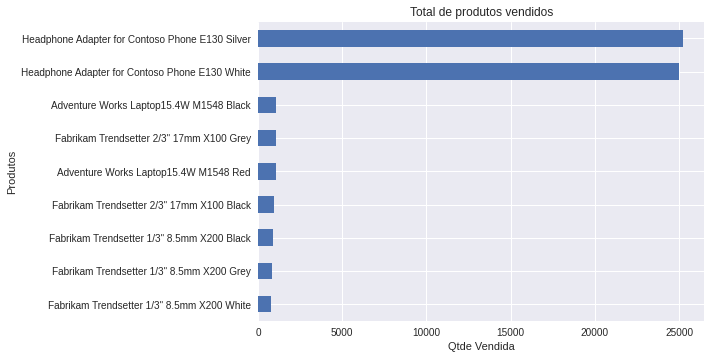

In [37]:
#Gráfico pizza do total de produtos vendidos
df.groupby([df["Produto"]])["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de produtos vendidos")
plt.xlabel("Qtde Vendida")
plt.ylabel("Produtos");

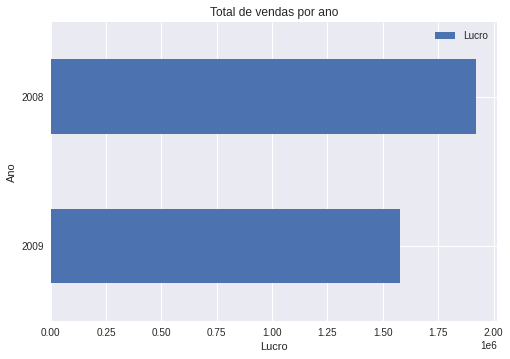

In [38]:
#Gráfico de lucro por ano
df.groupby([df["Data Venda"].dt.year])["Lucro"].sum().sort_values(ascending=True).plot.barh(title="Total de vendas por ano")
plt.xlabel("Lucro")
plt.ylabel("Ano")
plt.legend();

In [39]:
#Somando lucropor ano
df.groupby([df["Data Venda"].dt.year])["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [40]:
#Analisando apenas o ano de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [41]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


In [42]:
#Lucro por mês em 2009
df_2009.groupby([df_2009["Data Venda"].dt.month])["Lucro"].sum().sort_values(ascending=False)

Data Venda
7              227,134.51
6              200,310.41
2              179,228.92
3              147,538.25
12             142,330.53
11             132,202.23
1              130,719.04
10             130,678.05
5               90,540.00
9               83,952.62
4               66,354.39
8               46,756.42
Name: Lucro, dtype: float64

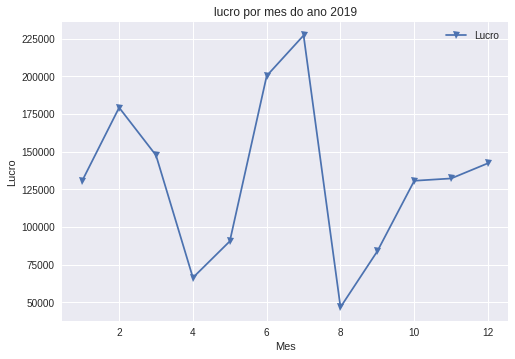

In [43]:
#Grafico em linha do lucro por mes do ano 2009
df_2009.groupby([df_2009["Data Venda"].dt.month])["Lucro"].sum().plot(title="lucro por mes do ano 2019", marker="v")
plt.xlabel("Mes")
plt.ylabel("Lucro")
plt.legend();

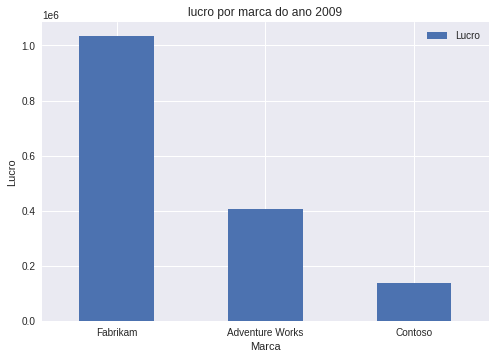

In [44]:
#Grafico do lucro por marca do ano de 2009 
df_2009.groupby([df["Marca"]])["Lucro"].sum().sort_values(ascending=False).plot.bar(title="lucro por marca do ano 2009")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.legend()
plt.xticks(rotation='horizontal');

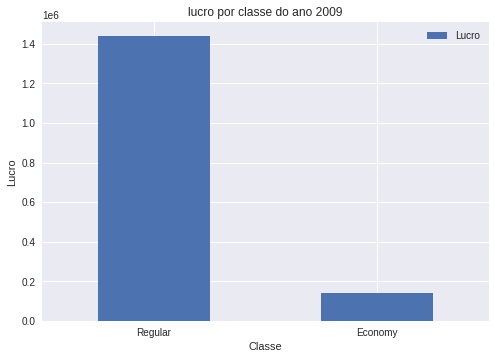

In [45]:
#Verificar o Lucro por classe
df_2009.groupby([df["Classe"]])["Lucro"].sum().sort_values(ascending=False).plot.bar(title="lucro por classe do ano 2009")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.legend()
plt.xticks(rotation='horizontal');

In [46]:
#Analise estatisticas do tempo de envio
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

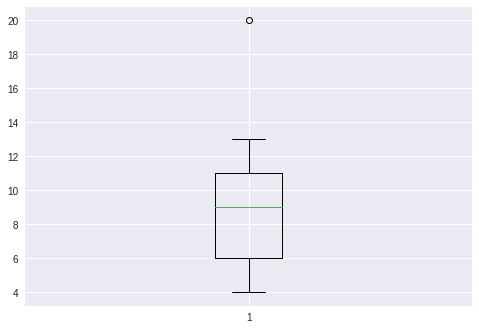

In [47]:
#Grafico de boxplot
plt.boxplot(df["Tempo Envio"]);

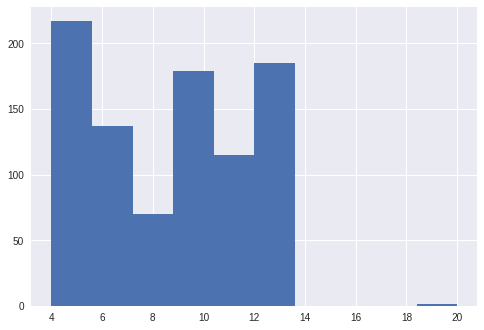

In [48]:
#Histograma do tempo de envio
plt.hist(df["Tempo Envio"]);

In [49]:
#Tempo minimo de envio
df["Tempo Envio"].min()

4

In [50]:
#Tempo maximo de envio
df["Tempo Envio"].max()

20

In [51]:
#Trazendoo valor outlier, tempo envio = 20
df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [52]:
#para baixar um arquivo com analise realizada
#index=false para não trazer o numero de index
df.to_csv("analise_exploratoria.csv", index=False)

In [53]:
#para baixar um arquivo com analise realizada
#index=false para não trazer o numero de index
df.to_csv("analise_exploratoria.xlsx", index=False)